In [1]:
!pip install d2l==1.0.3


In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [3]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

In [4]:
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

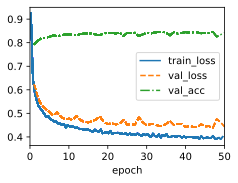

In [6]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=50)
trainer.fit(model, data)

In [ ]:
# A. Once a certain epoch is reached, there is overanalysis of the data which leads to a decrease in the overall accuracy. 
# To fix it, the amount of data (trainign and validation) could be 
